In [1]:
from wordcloud import WordCloud
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt


import io
from google.colab import files
uploaded = files.upload()


Saving wine.csv to wine.csv


In [2]:

df = pd.read_csv(io.BytesIO(uploaded["wine.csv"]))
#df = pd.read_csv("wine.csv")
#df

In [3]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[:]

Unnamed: 0       0
country          0
description      0
designation    269
points           0
price           57
province         0
region_1       173
region_2       611
variety          0
winery           0
dtype: int64

It depends the purpose of analysis on this dataset as to whether imputation is necessary on some NaN values. For instance, "Province" has no NaN values and provides geographical information for the wines and wineries along with "Country", so "Region_1" and "Region_2" could be dropped.

"Unnamed: 0" should be dropped as it does not contain useful data.

"Designation" could also be dropped because there are so many missing values it renders any analysis incomplete. 

"Description" could also be dropped as analysis will only be carried out on numerical data.

The missing values in "Price", however, could be converted to the integer -1 so that when data is analysed they will be grouped as outliers, making them easy to either disregard or investigate further. As there are not many in the overall data (approx 5%), it's unlikely doing so would affect the analysis too much.


In [4]:
df.drop(["Unnamed: 0", "description", "designation", "region_1", "region_2"], axis=1, inplace=True)
df

,country,points,price,province,variety,winery
0,US,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodr√≠guez
2,US,96,90.0,California,Sauvignon Blanc,Macauley
3,US,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,95,66.0,Provence,Provence red blend,Domaine de la B√©gude
...,...,...,...,...,...,...
1098,US,87,12.0,California,White Blend,Kitchen Sink
1099,US,87,20.0,New York,Riesling,Heron Hill
1100,US,87,28.0,Washington,Merlot,Chateau Ste. Michelle
1101,France,87,27.0,Bordeaux,Bordeaux-style Red Blend,Ch√¢teau Vieux Moulin


In [5]:
temp_df = df.loc[df.variety.isin(['Cabernet Sauvignon', 'Pinot Noir', 'Chardonnay'])]
temp_df

,country,points,price,province,variety,winery
0,US,96,235.0,California,Cabernet Sauvignon,Heitz
3,US,96,65.0,Oregon,Pinot Noir,Ponzi
8,US,95,65.0,Oregon,Pinot Noir,Bergstr√∂m
9,US,95,60.0,California,Pinot Noir,Blue Farm
11,US,95,48.0,Oregon,Pinot Noir,Patricia Green Cellars
...,...,...,...,...,...,...
1081,US,87,38.0,California,Cabernet Sauvignon,Sevtap
1082,US,87,14.0,New York,Chardonnay,Sheldrake Point
1085,US,87,40.0,New York,Cabernet Sauvignon,W√∂lffer
1089,US,87,25.0,New York,Cabernet Sauvignon,Chateau Lafayette Reneau


In [6]:
cs_df = temp_df.loc[df.variety.isin(['Cabernet Sauvignon'])]
cs_df = cs_df.iloc[:, [1,4]]
#cs_df

pn_df = temp_df.loc[df.variety.isin(['Pinot Noir'])]
pn_df = pn_df.iloc[:, [1,4]]
#pn_df

ch_df = temp_df.loc[df.variety.isin(['Chardonnay'])]
ch_df = ch_df.iloc[:, [1,4]]
ch_df



,points,variety
15,95,Chardonnay
23,95,Chardonnay
25,94,Chardonnay
31,90,Chardonnay
34,90,Chardonnay
...,...,...
1018,85,Chardonnay
1066,88,Chardonnay
1072,88,Chardonnay
1082,87,Chardonnay


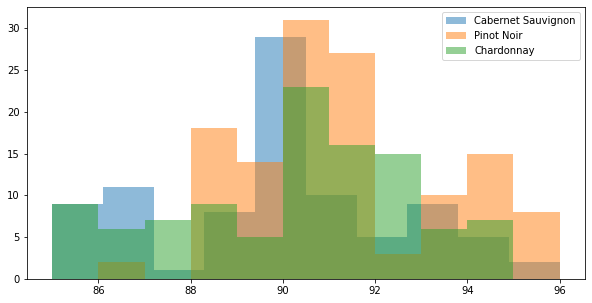

In [9]:
plt.figure(figsize=[10,5])
plt.hist(cs_df['points'], alpha=0.5, label='Cabernet Sauvignon')
plt.hist(pn_df['points'], alpha=0.5, label='Pinot Noir')
plt.hist(ch_df['points'], alpha=0.5, label='Chardonnay')
plt.legend()
plt.show()

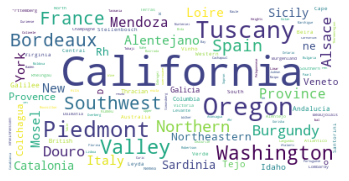

In [8]:
fields = ['province']
text2 = pd.read_csv('wine.csv', usecols=fields)

text3 = ' '.join(text2['province'])
wordcloud2 = WordCloud(background_color="white",collocations=False).generate(text3)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()
